In [3]:
import pandas as pd
import numpy as np
import scipy as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as py
import itertools

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data = pd.read_excel(io = 'task1.xlsx')
data_column = 'p_19'

In [5]:
data.head()

p_19
0    -3
1    -1
2    -1
3     0
4     0

In [6]:
data.describe() #основные числовые характеристики столбца данных

p_19
count  85.000000
mean    5.482353
std     3.076840
min    -3.000000
25%     3.000000
50%     5.000000
75%     8.000000
max    11.000000

In [7]:
data.mode() #мода

p_19
0     5

In [8]:
data.median() #медиана

p_19    5.0
dtype: float64

In [9]:
data.mean() #среднее значение выборки

p_19    5.482353
dtype: float64

In [10]:
#размах
print(data.max() - data.min())

p_19    14
dtype: int64


In [11]:
data.var() # выборочная дисперсия

p_19    9.466947
dtype: float64

In [12]:
data.std() # среднее отклонение

p_19    3.07684
dtype: float64

In [13]:
data.sem() # стандартная ошибка среднего

p_19    0.33373
dtype: float64

In [14]:
data.quantile([0,0.25,0.5,0.75,1]) # квантили

p_19
0.00  -3.0
0.25   3.0
0.50   5.0
0.75   8.0
1.00  11.0

In [15]:
data.quantile(0.75)-data.quantile(0.25) # интерквартильный размах

p_19    5.0
dtype: float64

<Axes: ylabel='Frequency'>

<Figure size 1600x600 with 0 Axes>

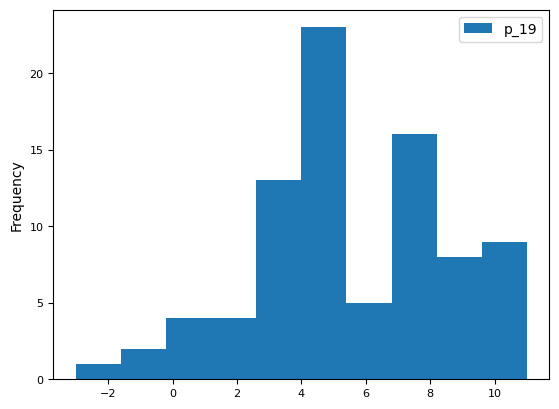

In [16]:
plt.figure(figsize=(16,6))
data.plot(kind = "hist", fontsize = 8) # гистограмма


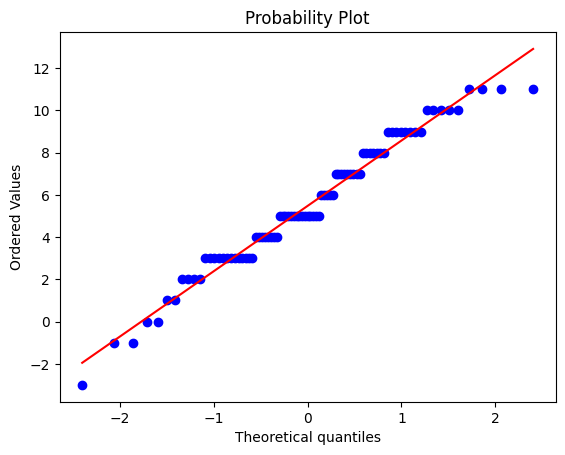

In [17]:
ss.stats.probplot(data[data_column], dist="norm", plot=plt) #QQ-plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22f1d675910>,
 'caps': [<matplotlib.lines.Line2D at 0x22f1d6773d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f1d6762d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f1d6778d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f1d680f90>],
 'means': []}

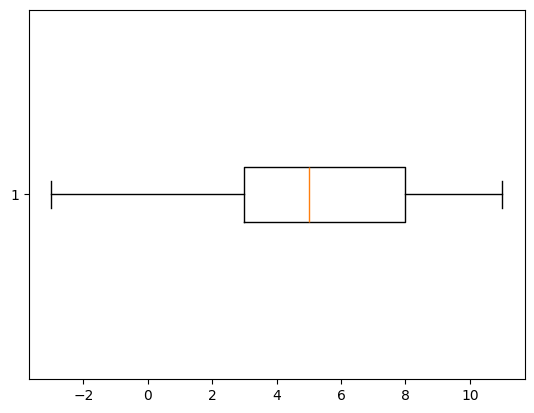

In [18]:
plt.boxplot(x = data[data_column], vert = False) #ящик с усами

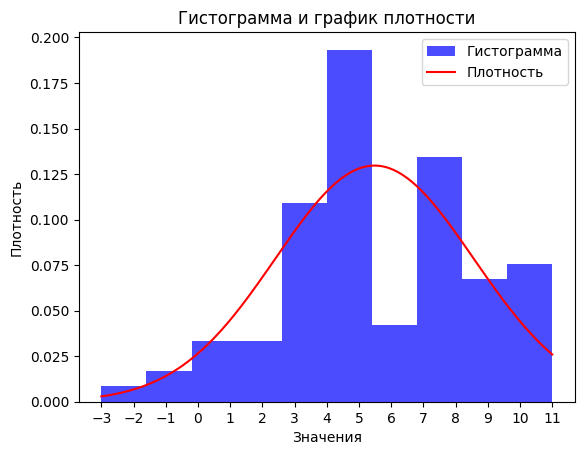

In [19]:
# Параметры для гистограммы и плотности
mean, std = data[data_column].mean(), data[data_column].std()
x_values = np.linspace(data[data_column].min(), data[data_column].max(), 200)
pdf_values = ss.stats.norm.pdf(x_values, mean, std)

# Создание фигуры и осей
fig, ax = plt.subplots()

# Построение гистограммы с нормализацией (density=True для сравнения с PDF)
ax.hist(data[data_column], bins=10, density=True, alpha=0.7, color='blue', label='Гистограмма')

# Построение графика нормальной плотности распределения
ax.plot(x_values, pdf_values, label='Плотность', color='red')

# Установка пределов оси X с шагом 1
x_min, x_max = int(np.floor(data[data_column].min())), int(np.ceil(data[data_column].max()))
ax.set_xticks(np.arange(x_min, x_max + 1, 1))

# Добавление названий осей и заголовка
ax.set_xlabel('Значения')
ax.set_ylabel('Плотность')
ax.set_title('Гистограмма и график плотности')

# Отображение легенды
ax.legend()

# Показать график
plt.show()

In [20]:
# Разбиение данных на бины и расчет эмпирических частот
bin_counts_empirical = [3, 8, 21, 15, 14, 7, 13, 4]
total_observations = len(data[data_column])
bin_edges = [-10000, -0.2, 2.6,
4,
5.4,
6.8,
8.2,
9.6,
10000]

# Расчет параметров нормального распределения (среднее и стандартное отклонение)
mean = np.mean(data[data_column])
std_dev = data.std()[0]

# Расчет ожидаемых частот для нормального распределения

expected_normal = np.zeros(len(bin_counts_empirical))
for i in range(len(bin_counts_empirical)):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    expected = total_observations * (ss.stats.norm.cdf(upper_bound, mean, std_dev) - ss.stats.norm.cdf(lower_bound, mean, std_dev))
    expected_normal[i] = expected

# Расчет статистики Хи-квадрат
chi2_normal = 0
for j in range(len(bin_counts_empirical)):
    observed = bin_counts_empirical[j]
    expected = expected_normal[j]
    if expected != 0:
        result = ((observed - expected) **2) / expected
        chi2_normal += result

# Определение степеней свободы
degrees_of_freedom = len(bin_counts_empirical) - 3  # Учитываем оценку двух параметров (среднее и стандартное отклонение)

# Уровень значимости и критическое значение
alpha = 0.01
chi2_critical = ss.stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Хи-квадрат для нормального распределения: {chi2_normal:.4f}")
print(f"Степени свободы: {degrees_of_freedom:.4f}")
print(f"Критическое значение Хи-квадрат: {chi2_critical:.4f}")

# Сравнение рассчитанного Хи-квадрат с критическим значением
if chi2_normal > chi2_critical:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

# Находим p-value
p_value = ss.stats.chi2.sf(chi2_normal, degrees_of_freedom)

print(f"p-value для статистики Хи-квадрат: {p_value:.6f}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н1")
else:
    print("Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0")

Хи-квадрат для нормального распределения: 15.0335
Степени свободы: 5.0000
Критическое значение Хи-квадрат: 15.0863
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0
p-value для статистики Хи-квадрат: 0.010220
Нет оснований отвергать нулевую гипотезу о нормальном распределении. Принимаем гипотезу Н0


C:\Users\kuzma\AppData\Local\Temp\ipykernel_10180\2444473616.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_dev = data.std()[0]


задание 2


In [21]:
df = pd.read_excel(io = 'task2.xlsx')
df.head()

y   x1   x2    x3   x4
0  222  4.5  8.6   8.1  121
1  223  4.5  8.7  12.3  143
2  230  2.5  8.9   7.2  144
3  232  2.5  8.9  12.4  128
4  231  4.5  8.9  12.3  129

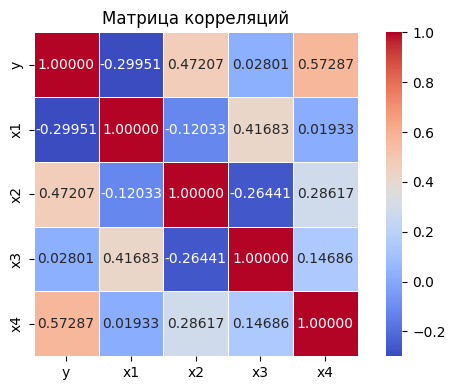

In [22]:
# Вычисление матрицы корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5, square=True)
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

In [23]:
# Создаем список всех возможных комбинаций столбцов X, исключая столбец 'y'
predictors = [col for col in df.columns if col != 'y']
combinations = []
for r in range(1, len(predictors) + 1):
    combinations.extend(itertools.combinations(predictors, r))

max_r2_adj = -np.inf
best_combo = None

# Перебираем все комбинации, строим модель и вычисляем Adj. R-squared
for combo in combinations:
    X = sm.add_constant(df[list(combo)])  # Добавляем константу к X
    y = df['y']

    try:
        model = sm.OLS(y, X).fit()
        if model.rsquared_adj > max_r2_adj:
            max_r2_adj = model.rsquared_adj
            best_combo = combo
        print(f"Для комбинации {combo} Adj. R-squared: {model.rsquared_adj:.4f}")
    except np.linalg.LinAlgError:
        print(f"Не удалось подобрать модель для комбинации {combo} из-за проблем с матрицей")

print(f"\nНаилучшая комбинация: {best_combo} с Adj. R-squared: {max_r2_adj:.4f}")

Для комбинации ('x1',) Adj. R-squared: 0.0391
Для комбинации ('x2',) Adj. R-squared: 0.1797
Для комбинации ('x3',) Adj. R-squared: -0.0547
Для комбинации ('x4',) Adj. R-squared: 0.2909
Для комбинации ('x1', 'x2') Adj. R-squared: 0.1982
Для комбинации ('x1', 'x3') Adj. R-squared: 0.0142
Для комбинации ('x1', 'x4') Adj. R-squared: 0.3570
Для комбинации ('x2', 'x3') Adj. R-squared: 0.1595
Для комбинации ('x2', 'x4') Adj. R-squared: 0.3647
Для комбинации ('x3', 'x4') Adj. R-squared: 0.2527
Для комбинации ('x1', 'x2', 'x3') Adj. R-squared: 0.2415
Для комбинации ('x1', 'x2', 'x4') Adj. R-squared: 0.4121
Для комбинации ('x1', 'x3', 'x4') Adj. R-squared: 0.3245
Для комбинации ('x2', 'x3', 'x4') Adj. R-squared: 0.3280
Для комбинации ('x1', 'x2', 'x3', 'x4') Adj. R-squared: 0.4108

Наилучшая комбинация: ('x1', 'x2', 'x4') с Adj. R-squared: 0.4121


In [24]:
# Подготовка данных с использованием лучшей комбинации переменных
X = df[list(best_combo)]  # Независимые переменные

# Добавление константы (свободного члена) к независимым переменным
X = sm.add_constant(X)

# Построение модели многофакторной регрессии
model = sm.OLS(y, X).fit()

# Получение основных характеристик модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     5.439
Date:                Tue, 21 May 2024   Prob (F-statistic):            0.00901
Time:                        13:56:16   Log-Likelihood:                -79.432
No. Observations:                  20   AIC:                             166.9
Df Residuals:                      16   BIC:                             170.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.6113     56.451      2.119      0.0